## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [2]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\User\AppData\Local\Temp\ipykernel_16344\1982607319.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
df.shape, df.head()

((1338, 7),
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [46]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [45]:
df['sex'].unique().sum(), df['smoker'].unique().sum(), df['region'].unique().sum()

(1, 1, array([3, 2, 1, 0], dtype=int64))

In [40]:
encode = LabelEncoder()
df['sex'] = encode.fit_transform(df['sex'])
df['smoker'] = encode.fit_transform(df['smoker'])
df['region'] = encode.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [44]:
df['sex'].unique(), df['smoker'].unique(), df['region'].unique()

(array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([3, 2, 1, 0], dtype=int64))

In [50]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)

    feature        VIF
0       age   9.247094
1       sex   2.007028
2       bmi  10.465005
3  children   1.805834
4    smoker   4.008939
5    region   2.951032
6   charges   7.922113


bmi dan age memiliki nilai multicollinearity yang tinggi, ini membuat kita tidak dapat menggunakan kedua fitur tersebut untuk model kita.

c:\Users\User\miniconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x800 with 0 Axes>

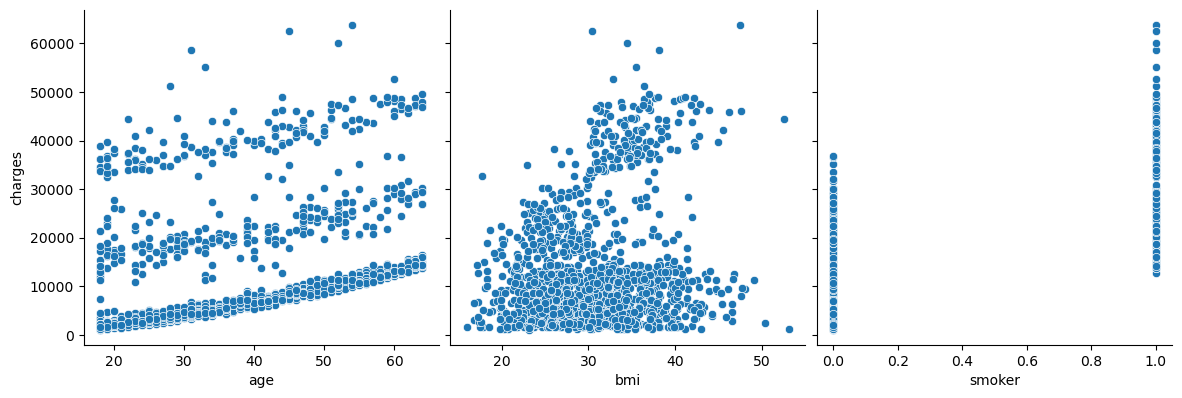

In [59]:
plt.figure(figsize = (8,8))
sns.pairplot(df, x_vars=['age', 'bmi','smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot: >

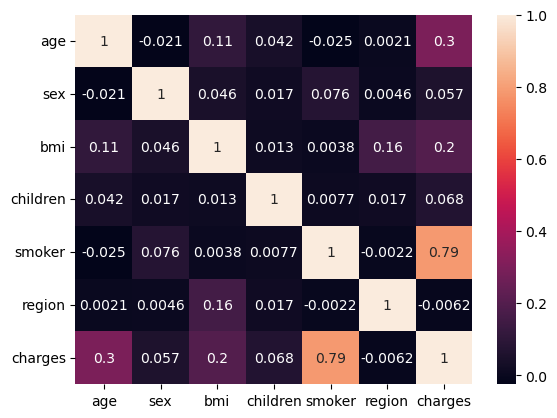

In [57]:
sns.heatmap(df.corr(), annot = True)

dari heatmap diatas, smoker dan charges memiliki korelasi yang cukup tinggi. Kita dapat membuat regresi dari kedua variabel tersebut

In [95]:
X = df['smoker']
y = df['charges']

X.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [97]:
# hasil training dtaset
X_train
y_train

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 936, dtype: float64

In [98]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [99]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      8512.964143
smoker    23946.493045
dtype: float64

In [100]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.60e-193
Time:                        21:18:35   Log-Likelihood:                -9688.1
No. Observations:                 936   AIC:                         1.938e+04
Df Residuals:                     934   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8512.9641    275.884     30.857      0.000    7971.539    9054.389
smoker      2.395e+04    625.647     38.275      0.000    2.27e+04    2.52e+04
==============================================================================
Omnibus:                      105.411   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.511
Skew:                           0.782   Prob(JB):                     3.12e-36
Kurtosis:                       4.322   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

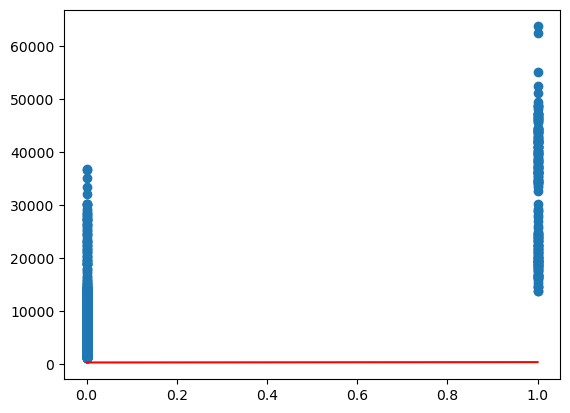

In [101]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [102]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\User\AppData\Local\Temp\ipykernel_16344\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


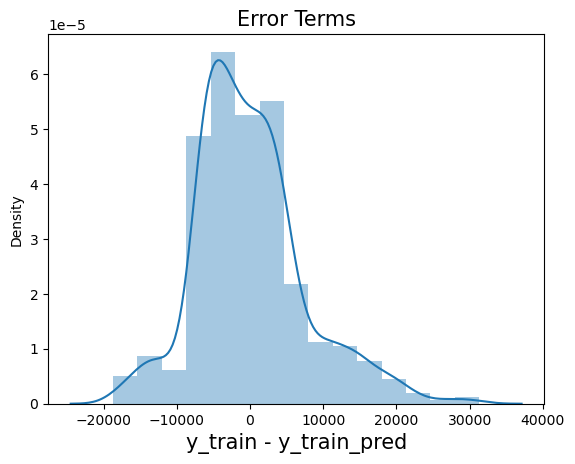

In [103]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

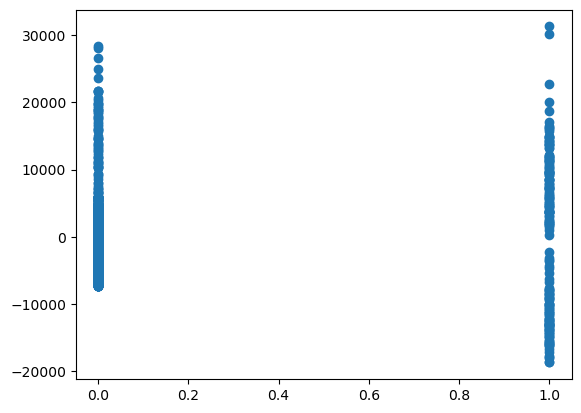

In [104]:
plt.scatter(X_train,res)
plt.show()

In [105]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

12      8512.964143
306     8512.964143
318     8512.964143
815     8512.964143
157    32459.457188
dtype: float64

In [109]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6401231940697196

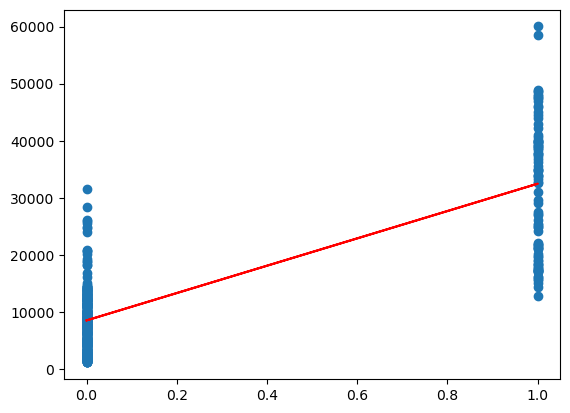

In [107]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()